In [1]:
import os
import numpy as np
import pandas as pd
from skimage.util.montage import montage2d
import matplotlib.pyplot as plt
base_path = os.path.join('..', 'data')

In [2]:
#train_df = pd.read_json('/Users/hanfeimao/Dropbox/Programming/iceberg/data/train.json', orient='records').set_index('id')


def load_and_format(in_path):
    out_df = pd.read_json(in_path)
    out_df['inc_angle'].replace('na', np.nan, inplace=True)
    out_images = out_df.apply(lambda c_row: [np.stack([c_row['band_1'],c_row['band_2']], -1).reshape((75,75,2))],1)
    out_images = np.stack(out_images).squeeze()
    return out_df, out_images

train_df, train_images = load_and_format(os.path.join(base_path, 'train.json'))
print('training', train_df.shape, 'loaded', train_images.shape)
test_df, test_images = load_and_format(os.path.join(base_path, 'test.json'))
print('testing', test_df.shape, 'loaded', test_images.shape)

training (1604, 5) loaded (1604, 75, 75, 2)
testing (8424, 4) loaded (8424, 75, 75, 2)


In [6]:
train_images = train_images/100+0.5

In [54]:
train_df.describe()

,inc_angle,is_iceberg
count,1471.000000,1604.000000
mean,39.268707,0.469451
std,3.839744,0.499222
min,24.754600,0.000000
25%,36.106100,0.000000
50%,39.501500,0.000000
75%,42.559100,1.000000
max,45.937500,1.000000


In [39]:
#rescale why?
(bands /100. +0.5)

(1604, 75, 75, 2)

In [7]:
def show_image(df, idx):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12, 6))
    ax1.matshow(df[idx,:,:,0])
    ax1.set_title('Band 1')
    ax2.matshow(df[idx,:,:,1])
    ax2.set_title('Band 2')
    plt.show()

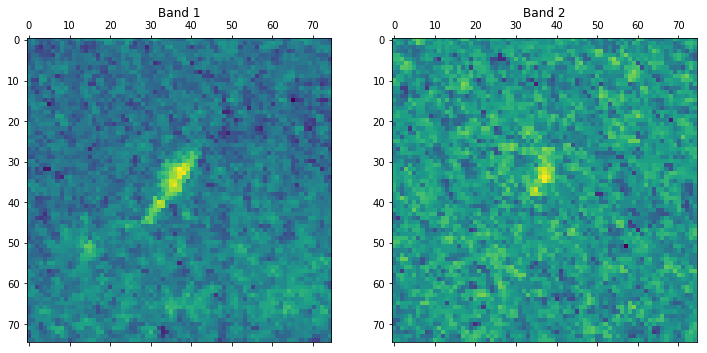

This is an iceberg


/Users/hanfeimao/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [8]:
#Train image
idx = 6
show_image(train_images, idx)
print("This is an iceberg" if train_df.ix[idx,'is_iceberg']==1 else "This is not an iceberg")

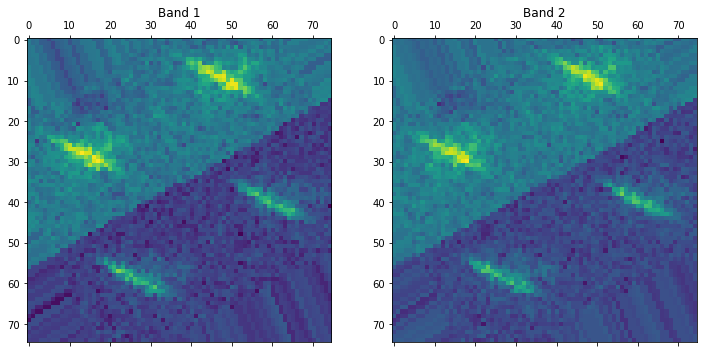

In [81]:
#Test Images
idx = 884
show_image(test_images, idx)